## STOCK

In [3]:
#http://www.andrewshamlet.net/2017/07/13/python-tutorial-stochastic-oscillator/

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:

# Stochastic Oscilator %K
def STOK(close, low, high, n): 
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 return STOK

# Stochastic Oscilator %D
def STOD(close, low, high, n):
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 STOD = pd.Series.rolling(STOK, 3).mean()
 return STOD
 STOD


In [43]:
#STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100

In [44]:
import datetime 
from pandas import read_csv
from pandas import concat
import os.path


start = datetime.datetime(2014, 1, 1)
end = datetime.datetime.now()
file_path='./data/aapl.csv'
#lastDate=df.index[df.shape[0]-1]
if not os.path.exists(file_path):
    print("Empty set")
    df =web.DataReader("AAPL",'yahoo',start,end)  
    df.to_csv('./data/aapl.csv')
    df.index.name = 'Date'
else:
    print("Read from file")  
    df = read_csv(file_path)
    df.set_index("Date",inplace=True)

  
    end = datetime.datetime.now()
    lastDate=df.index[df.shape[0]-1] #last recorded day
    d1 = datetime.datetime.strptime(lastDate, "%Y-%m-%d %H:%M:%S")   
    print(d1,end )
    if( d1 < end - datetime.timedelta(days=2)): # dont update on Sat or Sun
        print("Updating")  
        d2 = d1 + datetime.timedelta(days=1)
        df1 =web.DataReader("AAPL",'yahoo',d2,end)   
        print(df1)
        dft=pd.concat([df,df1])
        dft.to_csv('./data/aapl.csv')
   
##if( df[])
##
df.shape

Read from file
2017-11-17 00:00:00 2017-11-19 22:09:24.886808
Updating
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-17  171.039993  171.389999  169.639999  170.149994  170.149994   

              Volume  
Date                  
2017-11-17  21899544  


(979, 6)

In [45]:
#df.set_index("Date",inplace=True)
#df.index.name
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.382858,79.575714,78.860001,79.018570,73.522530,58671200
2014-01-03,78.980003,79.099998,77.204285,77.282860,71.907555,98116900
2014-01-06,76.778572,78.114288,76.228569,77.704285,72.299644,103152700
2014-01-07,77.760002,77.994286,76.845711,77.148575,71.782608,79302300
2014-01-08,76.972855,77.937141,76.955711,77.637146,72.237190,64632400


In [46]:
from sklearn.preprocessing import LabelEncoder
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
df['Avg5'] =pd.Series.rolling(df['Close'],5).mean()
df['Avg10'] =pd.Series.rolling(df['Close'],10).mean()
df['Rise'] = (df['Close'] - pd.Series.rolling(df['Close'],5).min() > 3 )*1
#df.tail()
df.shape

(979, 11)

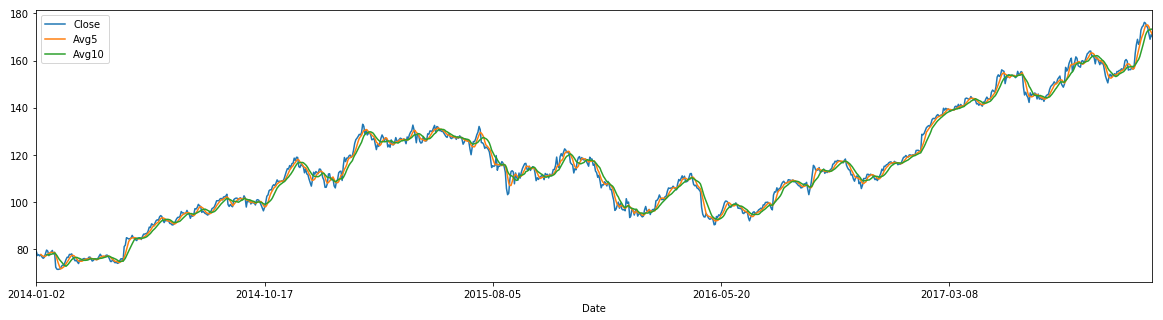

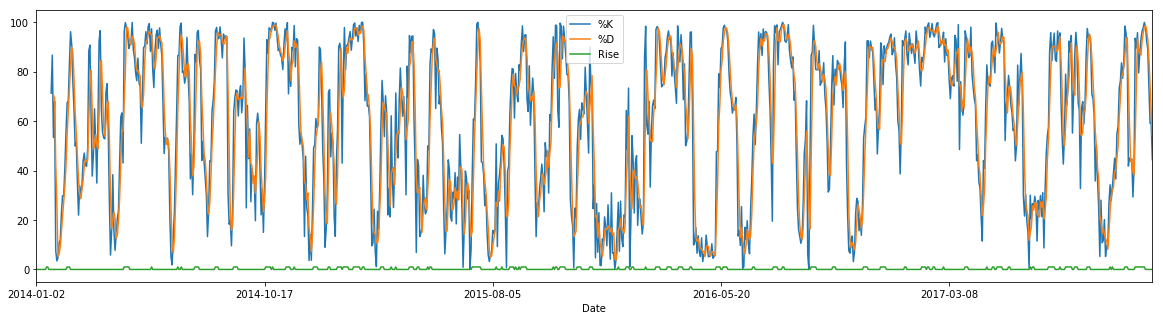

In [47]:
df.plot(y=['Close','Avg5','Avg10'], figsize = (20, 5))
df.plot(y=['%K', '%D','Rise'], figsize = (20, 5))

In [48]:
# convert series to supervised learning
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

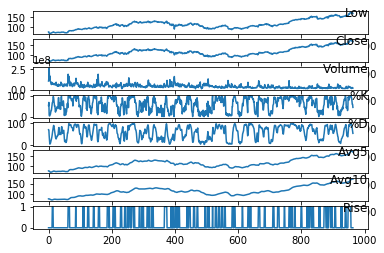

In [49]:
from matplotlib import pyplot

df.dropna(inplace=True)

values = df.values
# specify columns to plot
groups = [ 2, 3, 5, 6, 7,8,9,10]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [50]:
values[1]

array([  7.85814290e+01,   7.92571410e+01,   7.79642870e+01,
         7.86428600e+01,   7.31729430e+01,   1.38719700e+08,
         6.80079641e+01,   6.93821606e+01,   7.86665710e+01,
         7.83961433e+01,   0.00000000e+00])

In [51]:
'''values = np.array([[  10, 20, 30, 40, 50, 60, 0 ],
                  [  11, 21, 32, 43, 54, 65 ,0 ],
                  [  12, 22, 33, 44, 55, 66 ,1 ],
                  [  13, 23, 34, 45, 56, 67 ,1 ]])
values[1]'''

'values = np.array([[  10, 20, 30, 40, 50, 60, 0 ],\n                  [  11, 21, 32, 43, 54, 65 ,0 ],\n                  [  12, 22, 33, 44, 55, 66 ,1 ],\n                  [  13, 23, 34, 45, 56, 67 ,1 ]])\nvalues[1]'

In [54]:
from sklearn.preprocessing import MinMaxScaler

# ensure all data is float
values = values.astype('float')
#drop columns to simplify test
timesteps=3
features = values.shape[1]-1
# normalize features
scaler = MinMaxScaler()
#scaled = scaler.fit_transform(values)
scaled = values #scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled,timesteps, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18,19,20]], axis=1, inplace=True)
reframed= pd.DataFrame(reframed)
#print(reframed.head())
reframed.iloc[0]

var1(t-3)     7.914286e+01
var2(t-3)     7.937428e+01
var3(t-3)     7.782143e+01
var4(t-3)     7.801000e+01
var5(t-3)     7.258412e+01
var6(t-3)     1.073387e+08
var7(t-3)     5.339712e+01
var8(t-3)     7.049250e+01
var9(t-3)     7.838571e+01
var10(t-3)    7.814529e+01
var11(t-3)    0.000000e+00
var1(t-2)     7.858143e+01
var2(t-2)     7.925714e+01
var3(t-2)     7.796429e+01
var4(t-2)     7.864286e+01
var5(t-2)     7.317294e+01
var6(t-2)     1.387197e+08
var7(t-2)     6.800796e+01
var8(t-2)     6.938216e+01
var9(t-2)     7.866657e+01
var10(t-2)    7.839614e+01
var11(t-2)    0.000000e+00
var1(t-1)     7.268000e+01
var2(t-1)     7.357143e+01
var3(t-1)     7.172429e+01
var4(t-1)     7.235714e+01
var5(t-1)     6.732443e+01
var6(t-1)     2.663808e+08
var7(t-1)     7.620778e+00
var8(t-1)     4.300862e+01
var9(t-1)     7.745029e+01
var10(t-1)    7.797857e+01
var11(t-1)    0.000000e+00
var1(t)       7.199286e+01
var2(t)       7.248143e+01
var3(t)       7.123143e+01
var4(t)       7.153571e+01
v

In [59]:
values.shape

(961, 44)

In [57]:
# split into train and test sets
from keras.utils.np_utils import to_categorical

values = reframed.values
n_train_size = 600
train = values[:n_train_size, :]
test = values[n_train_size:, :]
# split into input and outputs
#train_X, train_y = train[:, :-1], to_categorical(train[:, -1])
train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], to_categorical(test[:, -1])
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((1,train_X.shape[0], train_X.shape[1]))
test_X = test_X.reshape((1,timesteps, features)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
#print(train_X[0:1,:])

ValueError: cannot reshape array of size 15523 into shape (1,3,11)

In [39]:
print(test_y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
# design network
model = Sequential()
''' this is good
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dense(2, activation='softmax'))'''

#Dense expects a 2-dimensional input (batch_size, features), 
#whereas the output of LSTM with return_sequences is 3 dimensional (batch_size, timesteps, features).

#stacked
model.add(LSTM(20,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(LSTM(20))
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())

'''model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))'''


#model.compile(loss='mae', optimizer='adam')
# it should be categorical
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 600, 20)           5120      
_________________________________________________________________
dense_3 (Dense)              (None, 600, 8)            168       
_________________________________________________________________
dense_4 (Dense)              (None, 600, 2)            18        
Total params: 5,306
Trainable params: 5,306
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 600, 20)           5120      
_________________________________________________________________
dense_3 (Dense)              (None, 600, 8)            168       
_________________________________________________________________
den

In [31]:
# fit network
#history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history = model.fit(train_X, train_y, epochs=20, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
'''pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()'''

ValueError: Error when checking target: expected dense_4 to have 3 dimensions, but got array with shape (600, 2)

In [41]:
# make a prediction
#test_X.shape
yhat = model.predict(test_X)
#yhat = model.predict(train_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

ValueError: Error when checking : expected lstm_1_input to have shape (None, 600, 65) but got array with shape (1, 354, 65)

In [47]:
yhat

array([[ 0.72617662,  0.27382332],
       [ 0.72014022,  0.27985978],
       [ 0.71684068,  0.28315929],
       [ 0.71626693,  0.2837331 ],
       [ 0.72124207,  0.2787579 ],
       [ 0.71372575,  0.28627422],
       [ 0.71205407,  0.28794593],
       [ 0.71188003,  0.28811997],
       [ 0.71305829,  0.28694171],
       [ 0.71895742,  0.28104258],
       [ 0.70987445,  0.29012546],
       [ 0.70862764,  0.29137236],
       [ 0.70992804,  0.29007202],
       [ 0.71298939,  0.28701064],
       [ 0.71390945,  0.28609055],
       [ 0.71539068,  0.28460929],
       [ 0.71606851,  0.28393149],
       [ 0.71589309,  0.28410691],
       [ 0.71938097,  0.28061903],
       [ 0.72132009,  0.27867985],
       [ 0.72263241,  0.27736759],
       [ 0.72324753,  0.2767525 ],
       [ 0.72748101,  0.27251905],
       [ 0.7270456 ,  0.27295434],
       [ 0.72987068,  0.27012932],
       [ 0.72805858,  0.27194136],
       [ 0.72981936,  0.27018061],
       [ 0.73130977,  0.26869023],
       [ 0.72833496,

In [149]:

#np.argwhere(yhat > 0.6)
np.where(yhat>0.5)[0]


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  22,  24,  29,  30,  31,  32,  33,  34,
        36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

In [146]:
yhat[21]

array([[ 0.49974352,  0.47702044]], dtype=float32)

In [138]:

import numpy as np
mycase= np.array([[ 5.8,  4. ,  1.2,  0.2,0.4,0.5,0.3,0.2 ,0.3,0.4]])
mycase=mycase.reshape(1,1,10)
model.predict(mycase)

array([[ 0.79172683,  0.20827314]], dtype=float32)

In [59]:
values[10,:]

array([ 0.03852263,  0.03150303,  0.03530217,  0.02953714,  0.03021936,
        0.32847463,  0.4099467 ,  0.31312716,  0.01433132,  0.00343808,  0.        ])

In [68]:
df.values[10,:]

array([  7.44828570e+01,   7.47042850e+01,   7.39114300e+01,
         7.42399980e+01,   6.94897990e+01,   9.25701000e+07,
         4.09946700e+01,   3.35373005e+01,   7.30028566e+01,
         7.30461419e+01,   0.00000000e+00])

In [ ]:
def custom_index(array, compare_function):

  for i, v in enumerate(array):

    if compare_function(v):

      return i